# Client Segmentation

## 1) Data Preprocessing

Netflix Dataset [Kaggle]: <https://www.kaggle.com/code/shivangi2018/netflix-users-data-analysis/notebook>

### Dataset loading with Kaggle API: kagglehub
Download the dataset directly from Kaggle using its *kagglehub* API and the *KaggleDatasetAdapter* class.

In [1]:
# Import Libraries for Kaggle API loading
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Random Seed
np.random.seed(8)

In [3]:
# Load Data with the KaggleDatasetAdapter
data = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "shivangi2018/netflix-user-dataset",
    "Netflix Userbase (1).csv",
)

100%|██████████| 167k/167k [00:00<00:00, 888kB/s]


In [4]:
# First Check
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
# Drop useless Var: User ID
data = data.drop('User ID', axis=1)
data.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [6]:
# Dataframe Dims
data.shape

(2500, 9)

### Describe Variables

Describir variables numéricas originales.

In [7]:
# Decribe Variables
data.describe()

,Monthly Revenue,Age
count,2500.000000,2500.000000
mean,12.508400,38.795600
std,1.686851,7.171778
min,10.000000,26.000000
25%,11.000000,32.000000
50%,12.000000,39.000000
75%,14.000000,45.000000
max,15.000000,51.000000


Información de cada variable. No hay nulos y no es necesario inputar valores.

In [8]:
# Dataframe Info -> No Nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subscription Type  2500 non-null   object
 1   Monthly Revenue    2500 non-null   int64 
 2   Join Date          2500 non-null   object
 3   Last Payment Date  2500 non-null   object
 4   Country            2500 non-null   object
 5   Age                2500 non-null   int64 
 6   Gender             2500 non-null   object
 7   Device             2500 non-null   object
 8   Plan Duration      2500 non-null   object
dtypes: int64(2), object(7)
memory usage: 175.9+ KB


La mayoría de variables son categóricas.

In [9]:
# DataTypes
data.dtypes

,0
Subscription Type,object
Monthly Revenue,int64
Join Date,object
Last Payment Date,object
Country,object
Age,int64
Gender,object
Device,object
Plan Duration,object


### Feature Engineering

In [10]:
# Date Format
data['Join Date'] = pd.to_datetime(data['Join Date'])
data['Join Date Month'] = data['Join Date'].dt.month
data

/tmp/ipython-input-97166098.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Join Date'] = pd.to_datetime(data['Join Date'])


,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Join Date Month
0,Basic,10,2022-01-15,10-06-23,United States,28,Male,Smartphone,1 Month,1
1,Premium,15,2021-05-09,22-06-23,Canada,35,Female,Tablet,1 Month,5
2,Standard,12,2023-02-28,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,2
3,Standard,12,2022-10-07,26-06-23,Australia,51,Female,Laptop,1 Month,10
4,Basic,10,2023-01-05,28-06-23,Germany,33,Male,Smartphone,1 Month,1
...,...,...,...,...,...,...,...,...,...,...
2495,Premium,14,2022-07-25,12-07-23,Spain,28,Female,Smart TV,1 Month,7
2496,Basic,15,2022-04-08,14-07-23,Spain,33,Female,Smart TV,1 Month,4
2497,Standard,12,2022-09-08,15-07-23,United States,38,Male,Laptop,1 Month,9
2498,Standard,13,2022-12-08,12-07-23,Canada,48,Female,Tablet,1 Month,12


Calcular el número de días activos mediante la diferencia de la última y primera fecha de pago. De ese modo, se extrae otra variable numérica continua.

In [11]:
# Calculate the difference
diff = pd.to_datetime(data['Last Payment Date']) - pd.to_datetime(data['Join Date'])  # This yields a Series of timedelta objects

# To get the number of days
days_difference = diff.dt.days
# Update Dataframe
data['Active Days'] = days_difference

# Drop Useless Vars: ["Join Date", "Last Payment Date"]
data.drop(["Join Date", "Last Payment Date"], axis=1, inplace=True)

/tmp/ipython-input-85860194.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  diff = pd.to_datetime(data['Last Payment Date']) - pd.to_datetime(data['Join Date'])  # This yields a Series of timedelta objects


In [12]:
# Drop Invalid Active Days <0
data = data[data['Active Days'] >= 0]

In [13]:
# Check Features
data.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Plan Duration,Join Date Month,Active Days
0,Basic,10,United States,28,Male,Smartphone,1 Month,1,629
1,Premium,15,Canada,35,Female,Tablet,1 Month,5,774
2,Standard,12,United Kingdom,42,Male,Smart TV,1 Month,2,119
3,Standard,12,Australia,51,Female,Laptop,1 Month,10,262
4,Basic,10,Germany,33,Male,Smartphone,1 Month,1,174


In [14]:
# Describe Again
data.describe()

,Monthly Revenue,Age,Join Date Month,Active Days
count,2487.000000,2487.000000,2487.000000,2487.000000
mean,12.509047,38.808605,7.314435,328.172497
std,1.685147,7.172535,2.714203,115.368881
min,10.000000,27.000000,1.000000,8.000000
25%,11.000000,32.000000,6.000000,249.000000
50%,12.000000,39.000000,7.000000,331.000000
75%,14.000000,45.000000,10.000000,402.000000
max,15.000000,51.000000,12.000000,776.000000


## 2) Exploratory Data Analysis

A continuación se muestra el EDA inicial.

In [15]:
# Libraries
import plotly.express as px

#### Plan Duration


In [16]:
# Var Dataframe
data_plan = data['Plan Duration'].value_counts()
data_plan

,count
Plan Duration,
1 Month,2487


In [17]:
# Pie Chart Fig
fig = px.pie(# Dataframe
             data_plan,
             # Var
             values='count',
             #title='Subscription Type',
             names=data_plan.index,
             # Hole -> Doughnot style
             hole=0.3,
             # Size
             width=650, height=450
             )

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="Plan Duration",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Traces
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(
                      line=dict(color='#000000', width=2)
                      )
                  )

# Show
fig.show()

La variable duración del plan es igual en todos los casos, por lo que no da info. adicional. Se opta por eliminarla.

In [18]:
# Drop useless Var: Plan Duration
data = data.drop('Plan Duration', axis=1)
data.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Join Date Month,Active Days
0,Basic,10,United States,28,Male,Smartphone,1,629
1,Premium,15,Canada,35,Female,Tablet,5,774
2,Standard,12,United Kingdom,42,Male,Smart TV,2,119
3,Standard,12,Australia,51,Female,Laptop,10,262
4,Basic,10,Germany,33,Male,Smartphone,1,174


#### Subscrition Type

In [19]:
# Var Dataframe
data_substype = data['Subscription Type'].value_counts()

In [20]:
# Pie Chart Fig
fig = px.pie(# Dataframe
             data_substype,
             # Var
             values='count',
             #title='Subscription Type',
             names=data_substype.index,
             # Hole -> Doughnot style
             hole=0.3,
             # Size
             width=650, height=450
             )

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="Subscription Type",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Traces
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(
                      line=dict(color='#000000', width=2)
                      )
                  )

# Show
fig.show()

El tipo de subscripción está bastante nivelado en las 3 categorías.

#### Country

In [21]:
# Var Dataframe
data_country = data['Country'].value_counts()

In [22]:
# Bar Chart Fig
fig = px.bar(# Dataframe
             data_country,
             # Color
             color = data_country.index,
             # Size
             width=800, height=450
             )

# Update the y-axis title for each subplot
fig.update_yaxes(title_text="Count")

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="Subscriptions per Country",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Traces
fig.update_traces(marker=dict(
                      line=dict(color='#000000', width=2)
                      )
                  )

# Show
fig.show()

Los dos países con un número notable de nuevas subscripciones por mes son España y EE.UU, seguidos ligeramente por Canadá.

#### Device

In [23]:
# Var Dataframe
data_device = data['Device'].value_counts()

In [24]:
# Pie Chart Fig
fig = px.pie(# Dataframe
             data_device,
             # Var
             values='count',
             #title='Subscription Type',
             names=data_device.index,
             # Hole -> Doughnot style
             hole=0.3,
             # Size
             width=650, height=450
             )

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="Device Type",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Traces
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(
                      line=dict(color='#000000', width=2)
                      )
                  )

# Show
fig.show()

Los dispositivos usados también están nivelados en sus 4 clases.

#### Gender

In [25]:
pd.unique(data['Gender'])

array(['Male', 'Female'], dtype=object)

In [26]:
# Var Dataframe
data_gender = data['Gender'].value_counts()

In [27]:
# Pie Chart Fig
fig = px.pie(# Dataframe
             data_gender,
             # Var
             values='count',
             #title='Subscription Type',
             names=data_gender.index,
             # Hole -> Doughnot style
             hole=0.3,
             # Size
             width=650, height=450
             )

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="Gender",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Traces
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(
                      line=dict(color='#000000', width=2)
                      )
                  )

# Show
fig.show()

El género también está nivelado 50-50%

#### Active Days

In [28]:
# Var Dataframe
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800]
data_active = pd.cut(data['Active Days'], bins=bins).value_counts().sort_index()
data_active.index = data_active.index.astype(str)

In [29]:
# Bar Chart Fig
fig = px.bar(# Dataframe
             data_active,
             # Color
             color = data_active.index,
             # Size
             width=800, height=450
             )

# Update the y-axis title for each subplot
fig.update_yaxes(title_text="Count")

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="Active Days of Clients",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Traces
fig.update_traces(marker=dict(
                      line=dict(color='#000000', width=2)
                      )
                  )

# Show
fig.show()

In [30]:
# Var Dataframe
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
data_active = pd.cut(data['Active Days'], bins=bins).value_counts().sort_index()
data_active.index = data_active.index.astype(str)

In [31]:
# Bar Chart Fig
fig = px.bar(# Dataframe
             data_active,
             # Color
             color = data_active.index,
             # Size
             width=800, height=450
             )

# Update the y-axis title for each subplot
fig.update_yaxes(title_text="Count")

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="Active Days of Clients",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Traces
fig.update_traces(marker=dict(
                      line=dict(color='#000000', width=2)
                      )
                  )

# Show
fig.show()

Los días activos son en extremo interesantes, pues la mayoría de clientes mantiene una actividad cercana a 1 año (365 días), o un poco menor. 300 días parece ser un punto de corte importante en la distribución.

#### Age

In [32]:
# Var Dataframe
bins = [0, 10, 20, 30, 40, 50, 60]
data_age = pd.cut(data['Age'], bins=bins).value_counts().sort_index()
data_age.index = data_age.index.astype(str)

In [33]:
# Bar Chart Fig
fig = px.bar(# Dataframe
             data_age,
             # Color
             color = data_age.index,
             # Size
             width=800, height=450
             )

# Update the y-axis title for each subplot
fig.update_yaxes(title_text="Count")

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="Ages of Clients",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Traces
fig.update_traces(marker=dict(
                      line=dict(color='#000000', width=2)
                      )
                  )

# Show
#fig.show()

La mayoría de clientes tiene una edad de entre 30-50 años, lo cual es esperado porque seguramente su economía es más estable que clientes más jóvenes y pueden pagar subscripción por más tiempo cómodamente.

In [34]:
# Var Dataframe
data_age = data.groupby('Country')['Age'].agg(lambda x: x.value_counts().idxmax())
data_age

,Age
Country,
Australia,40
Brazil,29
Canada,39
France,51
Germany,47
Italy,30
Mexico,48
Spain,31
United Kingdom,42


In [35]:
# Bar Chart Fig
fig = px.bar(# Dataframe
             data_age,
             # Color
             color = data_age.index,
             # Size
             width=1000, height=450
             )

# Update the y-axis title for each subplot
fig.update_yaxes(title_text="Count",
                 range=[20,60])

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="Most Common Age per Country",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Traces
fig.update_traces(marker=dict(
                      line=dict(color='#000000', width=2)
                      )
                  )

# Show
fig.show()

Nótese que lo dos países con mayor cantidad de subscripciones (España, EE.UU.) son justamente los que tienen una moda de edad de 30-35 años.

#### Month

In [36]:
# Var Dataframe
data_month = pd.DataFrame(data['Join Date Month'].value_counts())
data_month.sort_index(inplace=True)
data_month

,count
Join Date Month,
1,88
2,92
3,103
4,108
5,135
6,338
7,393
8,292
9,305


In [37]:
# Mapper
num_to_month_name = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
data_month['Month'] = data_month.index.map(num_to_month_name)

In [38]:
data_month

,count,Month
Join Date Month,,
1,88,Jan
2,92,Feb
3,103,Mar
4,108,Apr
5,135,May
6,338,Jun
7,393,Jul
8,292,Aug
9,305,Sep


In [39]:
# Bar Chart Fig
fig = px.bar(# Dataframe
             data_month,
             # Color
             color = 'Month',
             # Size
             width=1000, height=450
             )

# Update the y-axis title for each subplot
fig.update_yaxes(title_text="Count")

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="New Clients per Month",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Traces
fig.update_traces(marker=dict(
                      line=dict(color='#000000', width=2)
                      )
                  )

# Show
fig.show()

Otro factor muy importante es que existe un incremento en nuevas subscripciones en el segundo semestre del año, durante verano y otoño. Principalmente en julio y octubre.

#### Revenue

In [40]:
# Var Dataframe
data_revenue = data.groupby('Country')['Monthly Revenue'].mean()
data_revenue

,Monthly Revenue
Country,
Australia,12.417582
Brazil,12.486339
Canada,12.460568
France,12.606557
Germany,12.364641
Italy,12.662921
Mexico,12.224044
Spain,12.553333
United Kingdom,12.670330


In [41]:
# Bar Chart Fig
fig = px.bar(# Dataframe
             data_revenue,
             # Color
             color = data_revenue.index,
             # Size
             width=1000, height=450
             )

# Update the y-axis title for each subplot
fig.update_yaxes(title_text="Count",
                 range=[12,13])

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="Mean Revenue per Country",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Traces
fig.update_traces(marker=dict(
                      line=dict(color='#000000', width=2)
                      )
                  )

# Show
fig.show()

El retorno promedio por país parece estar equilibrado y México es el único caso notable con el menor retorno, pero la diferencia entre max-min no es mucha.

In [42]:
# Var Dataframe
data_revenue = data.groupby('Subscription Type')['Monthly Revenue'].mean()
data_revenue

,Monthly Revenue
Subscription Type,
Basic,12.485915
Premium,12.584362
Standard,12.467277


In [43]:
# Bar Chart Fig
fig = px.bar(# Dataframe
             data_revenue,
             # Color
             color = data_revenue.index,
             # Size
             width=1000, height=450
             )

# Update the y-axis title for each subplot
fig.update_yaxes(title_text="Count",
                 range=[12.4,12.7])

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="Mean Revenue per Subscription Type",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Traces
fig.update_traces(marker=dict(
                      line=dict(color='#000000', width=2)
                      )
                  )

# Show
fig.show()

El tipo de subscripción premium obviamente da un mejor retorno al tener una tarifa más alta.

In [44]:
# Var Dataframe
data_revenue = data.groupby('Age')['Monthly Revenue'].mean()

In [45]:
# Line Chart Fig
fig = px.line(# Dataframe
              data_revenue,
              x=data_revenue.index,
              y='Monthly Revenue',
              # Marker
              markers=True,
              # Size
              width=1000, height=450
              )

# Update the y-axis title for each subplot
fig.update_yaxes(title_text="Count",
                 range=[12,15.5])

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text="Mean Revenue per Age",
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

# Show
fig.show()

No parece haber una diferencia en el retorno marcada por la edad.

### Three Numerical Vars: Monthly Revenue, ActiveDays, Age

In [46]:
# Group by Monthly Revenue: Age
# Create Age Bins
max_age = data['Age'].max()
age_bins = pd.interval_range(start=0, end=max_age + 10, freq=10)
data['Age_Bin'] = pd.cut(data['Age'], bins=age_bins)

# Age Bins as str
data['Age_Bin_Label'] = data['Age_Bin'].astype(str)

# Group and count
counts = data.groupby(['Age_Bin_Label', 'Monthly Revenue']).size().reset_index(name='Count')

In [47]:
# Stacked Bar Plot
fig = px.bar(
    counts,
    x='Age_Bin_Label',
    y='Count',
    color=counts['Monthly Revenue'].astype(str),
    labels={'Age_Bin_Label': 'Age', 'Count': 'Frequency', 'color': 'Monthly Revenue'},
    # Size
    width=1000, height=450
)

# Make it a stacked bar chart
fig.update_layout(barmode='stack')

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text='Frequency of Monthly Revenue values per Age Bin (10-year intervals)',
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

fig.show()

El retorno agrupado por edad (10 años) parace estar uniformemente distribuido.

In [48]:
# Group by Monthly Revenue: Active Days
# Create Age Bins
max_age = data['Active Days'].max()
age_bins = pd.interval_range(start=0, end=max_age + 100, freq=100)
data['Active_Days_Bin'] = pd.cut(data['Active Days'], bins=age_bins)

# Age Bins as str
data['Active_Days_Bin_Label'] = data['Active_Days_Bin'].astype(str)

# Group and count
counts = data.groupby(['Active_Days_Bin_Label', 'Monthly Revenue']).size().reset_index(name='Count')

In [49]:
# Stacked Bar Plot
fig = px.bar(
    counts,
    x='Active_Days_Bin_Label',
    y='Count',
    color=counts['Monthly Revenue'].astype(str),
    labels={'Active_Days_Bin_Label': 'Active Days', 'Count': 'Frequency', 'color': 'Monthly Revenue'},
    # Size
    width=1000, height=450
)

# Make it a stacked bar chart
fig.update_layout(barmode='stack')

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text='Frequency of Monthly Revenue values per Active Days (100-days intervals)',
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

fig.show()

El retorno por días activos también no tiene un caso dominante.

In [50]:
# Group by Subscription Type: Age
# Create Age Bins
max_age = data['Age'].max()
age_bins = pd.interval_range(start=0, end=max_age + 10, freq=10)
data['Age_Bin'] = pd.cut(data['Age'], bins=age_bins)

# Age Bins as str
data['Age_Bin_Label'] = data['Age_Bin'].astype(str)

# Group and count
counts = data.groupby(['Age_Bin_Label', 'Subscription Type']).size().reset_index(name='Count')

In [51]:
# Stacked Bar Plot
fig = px.bar(
    counts,
    x='Age_Bin_Label',
    y='Count',
    color=counts['Subscription Type'].astype(str),
    labels={'Age_Bin_Label': 'Age', 'Count': 'Frequency', 'color': 'Subscription Type'},
    # Size
    width=1000, height=450
)

# Make it a stacked bar chart
fig.update_layout(barmode='stack')

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text='Frequency of Subscription Type values per Age Bin (10-year intervals)',
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

fig.show()

El tipo de subcripción por edad indica que la subcripción básica es la preferida por el público de todas las edades.

In [52]:
# Group by Subscription Type: Active Days
# Create Age Bins
max_age = data['Active Days'].max()
age_bins = pd.interval_range(start=0, end=max_age + 100, freq=100)
data['Active_Days_Bin'] = pd.cut(data['Active Days'], bins=age_bins)

# Age Bins as str
data['Active_Days_Bin_Label'] = data['Active_Days_Bin'].astype(str)

# Group and count
counts = data.groupby(['Active_Days_Bin_Label', 'Subscription Type']).size().reset_index(name='Count')

In [53]:
# Stacked Bar Plot
fig = px.bar(
    counts,
    x='Active_Days_Bin_Label',
    y='Count',
    color=counts['Subscription Type'].astype(str),
    labels={'Active_Days_Bin_Label': 'Active Days', 'Count': 'Frequency', 'color': 'Subscription Type'},
    # Size
    width=1000, height=450
)

# Make it a stacked bar chart
fig.update_layout(barmode='stack')

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text='Frequency of Subscription Type values per Active Days (100-days intervals)',
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  )
)

fig.show()

Y también se nota que las subscripciones básicas son las que más días activos tienen.

In [54]:
# Group by Month: Active Days
# Create Age Bins
max_age = data['Active Days'].max()
age_bins = pd.interval_range(start=0, end=max_age + 100, freq=100)
data['Active_Days_Bin'] = pd.cut(data['Active Days'], bins=age_bins)

# Age Bins as str
data['Active_Days_Bin_Label'] = data['Active_Days_Bin'].astype(str)
#data['Join Date Month'] = data['Join Date Month'].astype(str)

# Group and count
counts = data.groupby(['Join Date Month', 'Active_Days_Bin_Label']).size().reset_index(name='Count')

# Make sure all labels are in the DataFrame
all_days = sorted(counts['Active_Days_Bin_Label'].unique())
all_months = sorted(counts['Join Date Month'].unique())
for month in all_months:
    for day_bin in all_days:
        # Important: add 0 count combinations to have all labels ordered
        if day_bin not in list(counts['Active_Days_Bin_Label'][counts['Join Date Month']==month]):
            counts.loc[len(counts)] = [month, day_bin, 0]

# Sort
counts.sort_values(by=['Join Date Month', 'Active_Days_Bin_Label'], inplace=True)
counts[1:15]

,Join Date Month,Active_Days_Bin_Label,Count
0,1,"(100, 200]",7
67,1,"(200, 300]",0
1,1,"(300, 400]",7
2,1,"(400, 500]",16
3,1,"(500, 600]",47
4,1,"(600, 700]",11
68,1,"(700, 800]",0
69,2,"(0, 100]",0
5,2,"(100, 200]",5
70,2,"(200, 300]",0


In [55]:
# Add Calendar Month str
month_map = {
    '1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr',
    '5': 'May', '6': 'Jun', '7': 'Jul', '8': 'Aug',
    '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
}

# Apply mapping to your 'Join Date Month' column
desired_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
counts['Join Date Month Label'] = counts['Join Date Month'].replace(num_to_month_name)

In [56]:
# Stacked Bar Plot
fig = px.bar(
    counts,
    x='Active_Days_Bin_Label',
    y='Count',
    color='Join Date Month Label',
    labels={'Active_Days_Bin_Label': 'Active Days', 'Count': 'Frequency', 'color': 'Join Date Month'},
    # Size
    width=1000, height=450
)

# Make it a stacked bar chart
fig.update_layout(barmode='stack')

# Update the overall layout of the figure
fig.update_layout(# Overall Title
                  title=dict(
                      # Set text
                      text='Frequency of Join Date Month per Active Days (100-days intervals)',
                      # Center the title
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=25
                      )
                  ),
                  xaxis=dict(
                      categoryorder='array',
                      categoryarray=desired_order
                      )
                  )

fig.show()

Esta gráfica es muy importante, ya que muestra una clara relación entre el número de días activos y el principal mes de subscripción. Se nota que las personas que duraron 200-300 días activos se suscribieron principalmente en octubre y septiembre; y quienes duraron aprox. 1 año (300-400 días) lo hicieron en junio y julio.

In [57]:
# Remaining Vars
data.drop(['Age_Bin_Label', 'Active_Days_Bin_Label'], axis=1, inplace=True)
data.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Join Date Month,Active Days,Age_Bin,Active_Days_Bin
0,Basic,10,United States,28,Male,Smartphone,1,629,"(20, 30]","(600, 700]"
1,Premium,15,Canada,35,Female,Tablet,5,774,"(30, 40]","(700, 800]"
2,Standard,12,United Kingdom,42,Male,Smart TV,2,119,"(40, 50]","(100, 200]"
3,Standard,12,Australia,51,Female,Laptop,10,262,"(50, 60]","(200, 300]"
4,Basic,10,Germany,33,Male,Smartphone,1,174,"(30, 40]","(100, 200]"


In [58]:
# Encode Subscription Type: Numerical
#data['Subscription Type'] = data['Subscription Type'].map({'Basic': 1, 'Standard': 2, 'Premium': 3})
# Encode Device: Numerical
#data['Device'] = data['Device'].map({'Smartphone': 1, 'Tablet': 2, 'Laptop': 3, 'Smart TV': 4})
#data.head()

## 3) Correlation Analysis

Análisis de correlación entre las tres variables numéricas.

In [59]:
# Vars
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2487 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Subscription Type  2487 non-null   object  
 1   Monthly Revenue    2487 non-null   int64   
 2   Country            2487 non-null   object  
 3   Age                2487 non-null   int64   
 4   Gender             2487 non-null   object  
 5   Device             2487 non-null   object  
 6   Join Date Month    2487 non-null   int32   
 7   Active Days        2487 non-null   int64   
 8   Age_Bin            2487 non-null   category
 9   Active_Days_Bin    2487 non-null   category
dtypes: category(2), int32(1), int64(3), object(4)
memory usage: 170.7+ KB


In [60]:
# Just Numerical Data
data_num = data.select_dtypes(include=['int64', 'float64'])
#data_num.drop(['Subscription Type', 'Device'], inplace=True, axis=1)
data_num.head()

,Monthly Revenue,Age,Active Days
0,10,28,629
1,15,35,774
2,12,42,119
3,12,51,262
4,10,33,174


In [61]:
# Correlation Matrix
corr_matrix = data_num.corr(method="pearson", numeric_only=True).round(4)

# Heatmap
fig = px.imshow(# Data
                corr_matrix,
                # Continuous cmap colour
                color_continuous_scale='RdBu',
                # Add corr values
                text_auto=True,
                # Corr range
                range_color=[-1, 1]
                )

# Aesthetics & Layout
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=800,
                  # Adjust overall width based on number of columns * Pixels
                  width=800,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="Correlation Heatmap",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)

# Show plot
fig.show()

No hay ninguna correlación entre las vars numéricas, algo que ya se notaba desde el EDA. Por lo que lo más recomedable es una segmentación categórica.

## 4) Segmentation: Clustering

### K-Modes

Primero se opta por la segmentación categórica con el algoritmo de K-modas. Se instala y descargan librerías.

In [ ]:
# Install
!pip install kmodes

In [ ]:
# Library
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [ ]:
# Check Data
data.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Join Date Month,Active Days,Age_Bin,Active_Days_Bin
0,Basic,10,United States,28,Male,Smartphone,1,629,"(20, 30]","(600, 700]"
1,Premium,15,Canada,35,Female,Tablet,5,774,"(30, 40]","(700, 800]"
2,Standard,12,United Kingdom,42,Male,Smart TV,2,119,"(40, 50]","(100, 200]"
3,Standard,12,Australia,51,Female,Laptop,10,262,"(50, 60]","(200, 300]"
4,Basic,10,Germany,33,Male,Smartphone,1,174,"(30, 40]","(100, 200]"


Se mantienen las variables categóricas, incluyendo los bins de edad y días activos para aumentar la precisión.

In [ ]:
# Prepare Dataframe with categorical vars
data_kmodes = data.drop(['Age', 'Active Days'], axis=1)
data_kmodes_cols = data_kmodes.columns
data_kmodes.head()

,Subscription Type,Monthly Revenue,Country,Gender,Device,Join Date Month,Age_Bin,Active_Days_Bin
0,Basic,10,United States,Male,Smartphone,1,"(20, 30]","(600, 700]"
1,Premium,15,Canada,Female,Tablet,5,"(30, 40]","(700, 800]"
2,Standard,12,United Kingdom,Male,Smart TV,2,"(40, 50]","(100, 200]"
3,Standard,12,Australia,Female,Laptop,10,"(50, 60]","(200, 300]"
4,Basic,10,Germany,Male,Smartphone,1,"(30, 40]","(100, 200]"


Se codifican las variables para poder aplicar método de silueta.

In [ ]:
# Data Encoding
encoder = OrdinalEncoder()
data_kmodes_encode = encoder.fit_transform(data_kmodes)
data_kmodes_encode = pd.DataFrame(data_kmodes_encode, columns=data_kmodes_cols)
data_kmodes_encode.head()

,Subscription Type,Monthly Revenue,Country,Gender,Device,Join Date Month,Age_Bin,Active_Days_Bin
0,0.0,0.0,9.0,1.0,2.0,0.0,0.0,6.0
1,1.0,5.0,2.0,0.0,3.0,4.0,1.0,7.0
2,2.0,2.0,8.0,1.0,1.0,1.0,2.0,1.0
3,2.0,2.0,0.0,0.0,0.0,9.0,3.0,2.0
4,0.0,0.0,4.0,1.0,2.0,0.0,1.0,1.0


Silhouette Score for k=2: 0.010303251208817713
Silhouette Score for k=3: -0.014174721252333778
Silhouette Score for k=4: -0.017122257928887465
Silhouette Score for k=5: -0.03535380133130391
Silhouette Score for k=6: -0.03880343670514925
Silhouette Score for k=7: -0.04425115394884278
Silhouette Score for k=8: -0.06116996063337088
Silhouette Score for k=9: -0.05527829361540591
Silhouette Score for k=10: -0.07196064856673372
Silhouette Score for k=11: -0.06489003244395918
Silhouette Score for k=12: -0.07937014350909329
Silhouette Score for k=13: -0.06743957493570032
Silhouette Score for k=14: -0.10442127480250675
Silhouette Score for k=15: -0.0866400551920739
Silhouette Score for k=16: -0.09656841106984351
Silhouette Score for k=17: -0.08071102527695909
Silhouette Score for k=18: -0.13967586880423968
Silhouette Score for k=19: -0.08898963119955017


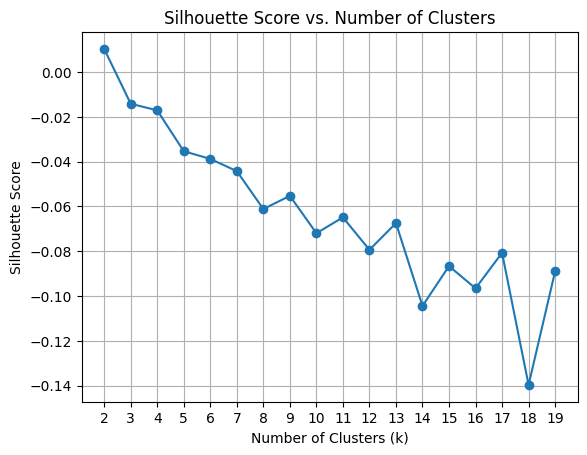

Optimal k: 2


In [ ]:
# Silhouette Score
k_values = range(2, 20)
silhouette_scores = []

for k in k_values:
    km = KModes(n_clusters=k, init='Huang', verbose=0)
    clusters = km.fit_predict(data_kmodes_encode)
    score = silhouette_score(data_kmodes_encode, clusters)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
print("Optimal k:", best_k)

El método de silueta sugiere 2 clusters.

In [ ]:
# K-Modes algorithm
# Initialize K-Modes with 2 clusters
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data_kmodes)
data_kmodes['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 700, cost: 12038.0
Run 1, iteration: 2/100, moves: 344, cost: 11928.0
Run 1, iteration: 3/100, moves: 9, cost: 11928.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 505, cost: 11964.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 556, cost: 11917.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 697, cost: 12132.0
Run 4, iteration: 2/100, moves: 145, cost: 12132.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 551, cost: 12080.0
Run 5, iteration: 2/100, moves: 3, cost: 12080.0
Best run was number 3


In [ ]:
import pandas as pd

# Assuming you have your data in X and the model has been fitted
labels = km.labels_  # cluster labels for each data point

# Count the number of data points in each cluster
cluster_sizes = pd.Series(labels).value_counts().sort_index()

# Create a DataFrame for presentation
sizes_df = pd.DataFrame({'Cluster': cluster_sizes.index, 'Size': cluster_sizes.values})
sizes_df

,Cluster,Size
0,0,1365
1,1,1122


Se nota que los dos clusters tiene un número balanceado de individuos (~1.3k y ~1.1k)

In [ ]:
# Get clusters
clusters = km.labels_

# Create a DataFrame with cluster labels
X_with_clusters = data_kmodes.copy()
X_with_clusters['Cluster'] = clusters

# Calculate modal categories per cluster
cluster_modes = []

for cluster in sorted(X_with_clusters['Cluster'].unique()):
    cluster_data = X_with_clusters[X_with_clusters['Cluster'] == cluster]
    mode_dict = {'Cluster': cluster}
    for col in data_kmodes.columns:
        mode_value = cluster_data[col].mode()[0]
        mode_dict[col] = mode_value
    cluster_modes.append(mode_dict)

# Convert to DataFrame
cluster_modes_df = pd.DataFrame(cluster_modes)
cluster_modes_df.set_index('Cluster', inplace=True)
cluster_modes_df = pd.concat([cluster_modes_df, data_kmodes['Cluster'].value_counts()], axis=1)

cluster_modes_df.head()

,Subscription Type,Monthly Revenue,Country,Gender,Device,Join Date Month,Age_Bin,Active_Days_Bin,count
Cluster,,,,,,,,,
0,Standard,12,Spain,Male,Laptop,10,"(40, 50]","(200, 300]",1365
1,Basic,10,United States,Female,Tablet,7,"(30, 40]","(300, 400]",1122


Esta tabla es central, ya que muestra las modas de la segmentación mediante K-modas. Y de hecho, explica muy bien lo visto en el EDA. El primer cluster representa el grupo que mayormente tuvo una subscripción básica, en España, con un retorno de 12, y que la mayoría fueron hombres de 40-50 años que se unieron en octubre y duraron poco menos de 1 año (200-300) días. Siendo 300 días un punto de corte notable. Y el segundo cluster muestra que la mayoría fueron mujeres de 30-40 años con un paquet básico, de EE.UU. con un retorno de 7 y con aprox. 1 año de días activos (300-400). Esto explica las relaciones entre las principales variables de interés mostradas en el EDA.

In [ ]:
data.columns

Index(['Subscription Type', 'Monthly Revenue', 'Country', 'Age', 'Gender',
       'Device', 'Join Date Month', 'Active Days', 'Age_Bin',
       'Active_Days_Bin'],
      dtype='object')

In [ ]:
# Plot
fig = px.scatter_3d(data, x='Gender', y='Join Date Month', z='Active Days', color=data_kmodes['Cluster'])
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="K-Modes Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

Se visualiza mediante las variable categóricas y se alcanza a ver cierta separación en los clusters. Claro que la visualización en 3D es limitada dado que tenemos 9 vars categóricas. Pero es una buena intuición.

In [ ]:
# Plot
fig = px.scatter_3d(data, x='Age', y='Subscription Type', z='Active Days', color=data_kmodes['Cluster'])
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="K-Modes Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

In [ ]:
# Plot
fig = px.scatter_3d(data, x='Gender', y='Age', z='Country', color=data_kmodes['Cluster'])
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="K-Modes Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

Otros algoritmos aplicados a las variables numéricas no mostraron un resultado tan convincente. Probablemente porque, como vimos antes, no parece haber una relación muy fuerte entre ellas. Pero el resultado más importante es que varios también dieron 2 clusters (Jerárquico y Aglomerativo). Algunos incluso segmentaron más allá y dieron 3 o 6 (Spectral, K-means,). Algunos no lograron segmentar convincentemente (DBSCAN y GMM). Pero tanto los que segmentaron en 2, 3 y 6 clusters concordaron en que días activos en 300 es el punto de corte común para todos. Comprobando así lo antes predicho por K-Modas.

### K-means

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Join Date Month,Active Days,Age_Bin,Active_Days_Bin
0,Basic,10,United States,28,Male,Smartphone,1,629,"(20, 30]","(600, 700]"
1,Premium,15,Canada,35,Female,Tablet,5,774,"(30, 40]","(700, 800]"
2,Standard,12,United Kingdom,42,Male,Smart TV,2,119,"(40, 50]","(100, 200]"
3,Standard,12,Australia,51,Female,Laptop,10,262,"(50, 60]","(200, 300]"
4,Basic,10,Germany,33,Male,Smartphone,1,174,"(30, 40]","(100, 200]"


In [ ]:
# Drop Catgeorical Vars
data_kmeans = data.drop(['Country', 'Subscription Type', 'Device', 'Gender', 'Join Date Month', 'Age_Bin', 'Active_Days_Bin'], axis=1, inplace=False)
data_kmeans.head()

,Monthly Revenue,Age,Active Days
0,10,28,629
1,15,35,774
2,12,42,119
3,12,51,262
4,10,33,174


In [ ]:
# Standarization
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_kmeans), columns=data_kmeans.columns)
data_scaled.head()

,Monthly Revenue,Age,Active Days
0,-1.489218,-1.507247,2.608052
1,1.478479,-0.531105,3.865142
2,-0.302139,0.445036,-1.813440
3,-0.302139,1.700075,-0.573689
4,-1.489218,-0.810003,-1.336613


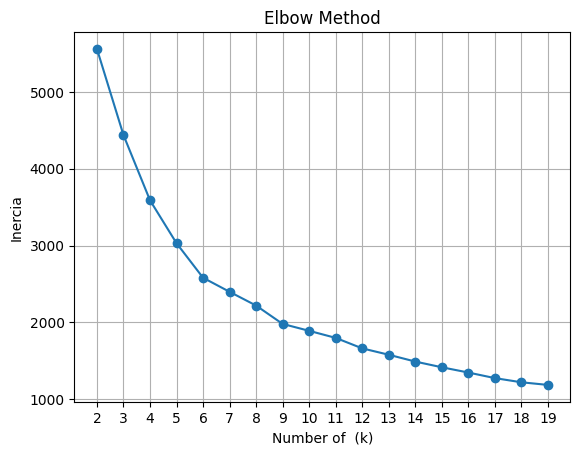

In [ ]:
# Elbow Method
inertia = []
k_values = range(2, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of  (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid()
plt.show()

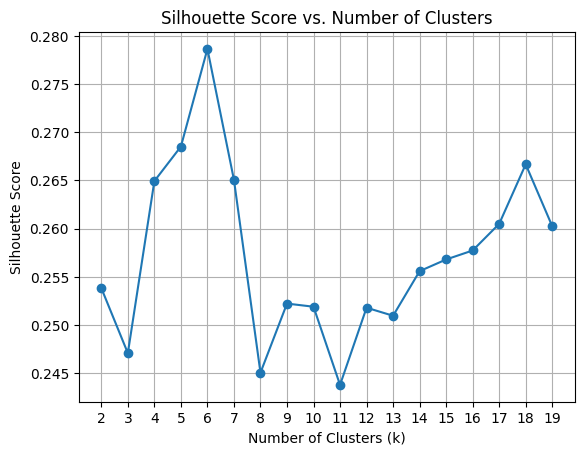

Optimal k: 6


In [ ]:
# Silhouette Score
k_values = range(2, 20)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)

    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
print("Optimal k:", best_k)

In [ ]:
# Algorithm
kmeans = KMeans(n_clusters=6, random_state=20, init="k-means++")
labels = kmeans.fit_predict(data_scaled)

In [ ]:
# Plot
fig = px.scatter_3d(data, x='Age', y='Active Days', z='Monthly Revenue', color=labels.astype(str))
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="K-means Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

In [ ]:
# Drop Catgeorical Vars
data_kmeans = data.drop(['Country', 'Subscription Type', 'Device', 'Gender', 'Join Date Month', 'Monthly Revenue', 'Age_Bin', 'Active_Days_Bin'], axis=1, inplace=False)
data_kmeans.head()

,Age,Active Days
0,28,629
1,35,774
2,42,119
3,51,262
4,33,174


In [ ]:
# Standarization
scaler = StandardScaler()
data_scaled_2 = pd.DataFrame(scaler.fit_transform(data_kmeans), columns=data_kmeans.columns)
data_scaled_2.head()

,Age,Active Days
0,-1.507247,2.608052
1,-0.531105,3.865142
2,0.445036,-1.813440
3,1.700075,-0.573689
4,-0.810003,-1.336613


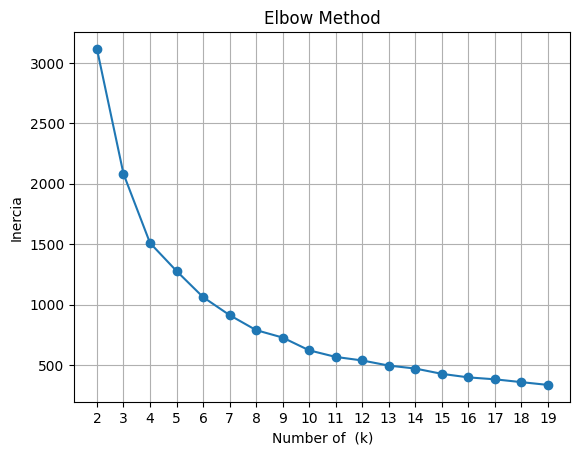

In [ ]:
# Elbow Method
inertia = []
k_values = range(2, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_2)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of  (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid()
plt.show()

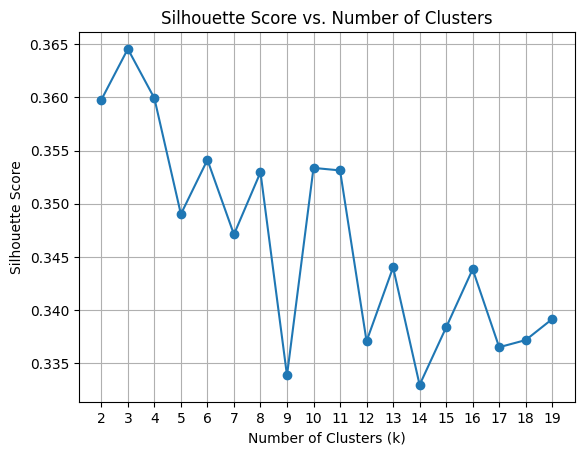

Optimal k: 3


In [ ]:
# Silhouette Score
k_values = range(2, 20)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_2)

    score = silhouette_score(data_scaled_2, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
print("Optimal k:", best_k)

In [ ]:
# Algorithm
kmeans = KMeans(n_clusters=3, random_state=20, init="k-means++")
labels = kmeans.fit_predict(data_scaled_2)

In [ ]:
# Plot
fig = px.scatter(data, x='Age', y='Active Days', color=labels.astype(str))
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="K-means Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

### Hierarchical Clustering

In [ ]:
# Libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [ ]:
# Drop Vars
#data_hierarch = data.drop(['Country', 'Device', 'Join Date Month'], axis=1, inplace=False)
data_hierarch = data.copy()
data_hierarch.drop(['Age_Bin', 'Active_Days_Bin'], axis=1, inplace=True)
data_hierarch.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Join Date Month,Active Days
0,Basic,10,United States,28,Male,Smartphone,1,629
1,Premium,15,Canada,35,Female,Tablet,5,774
2,Standard,12,United Kingdom,42,Male,Smart TV,2,119
3,Standard,12,Australia,51,Female,Laptop,10,262
4,Basic,10,Germany,33,Male,Smartphone,1,174


In [ ]:
# Encode Vars
encoder = LabelBinarizer()
data_hierarch['Gender'] = encoder.fit_transform(data_hierarch['Gender'])
encoder = LabelEncoder()
data_hierarch['Country'] = encoder.fit_transform(data_hierarch['Country'])
encoder = LabelEncoder()
data_hierarch['Subscription Type'] = encoder.fit_transform(data_hierarch['Subscription Type'])
encoder = LabelEncoder()
data_hierarch['Device'] = encoder.fit_transform(data_hierarch['Device'])
data_hierarch.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Join Date Month,Active Days
0,0,10,9,28,1,2,1,629
1,1,15,2,35,0,3,5,774
2,2,12,8,42,1,1,2,119
3,2,12,0,51,0,0,10,262
4,0,10,4,33,1,2,1,174


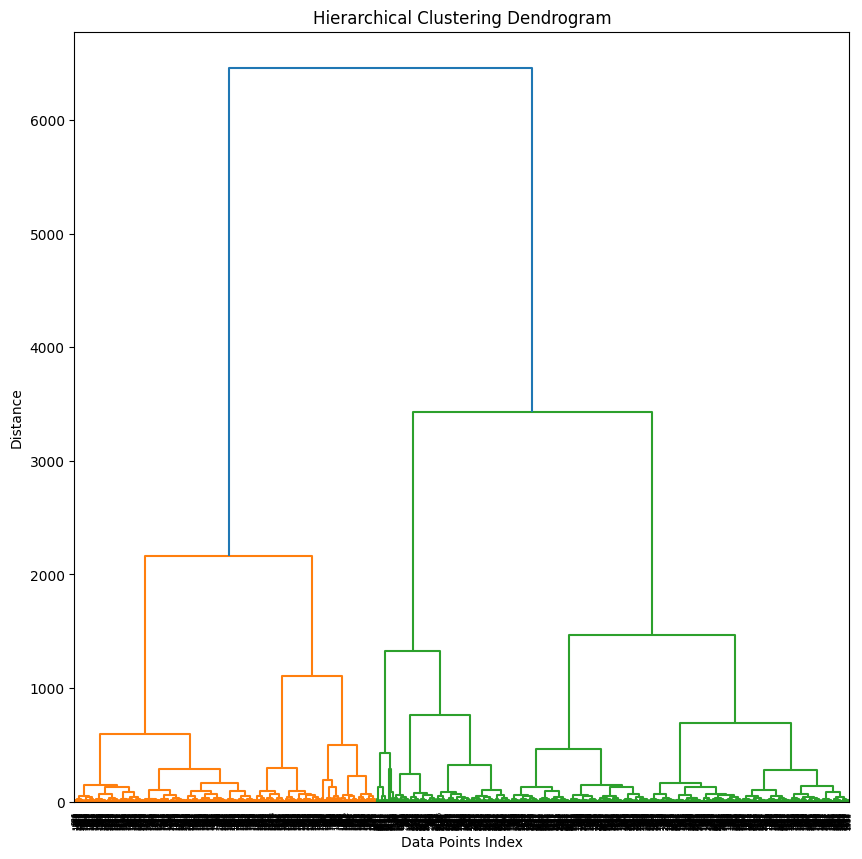

In [ ]:
# Algorithm: hierarchical Clustering
Z = linkage(data_hierarch, method='ward', metric="euclidean")

# Dendrogram
plt.figure(figsize=(10, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Algorithm: Agglomerative Clustering
n_clusters = 6
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,  linkage='ward')
labels = agg_clustering.fit_predict(data_hierarch)
data_hierarch['Cluster'] = labels
data_hierarch.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Join Date Month,Active Days,Cluster
0,0,10,9,28,1,2,1,629,5
1,1,15,2,35,0,3,5,774,5
2,2,12,8,42,1,1,2,119,0
3,2,12,0,51,0,0,10,262,3
4,0,10,4,33,1,2,1,174,0


In [ ]:
# Plot
fig = px.scatter(data_hierarch, x='Active Days', y='Age', color=labels.astype(str))
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="Aglomerative Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

In [ ]:
# Algorithm: Agglomerative Clustering
n_clusters = 2 # From Hierarchical
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,  linkage='ward')
labels = agg_clustering.fit_predict(data_hierarch)
data_hierarch['Cluster'] = labels
data_hierarch.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Join Date Month,Active Days,Cluster
0,0,10,9,28,1,2,1,629,0
1,1,15,2,35,0,3,5,774,0
2,2,12,8,42,1,1,2,119,1
3,2,12,0,51,0,0,10,262,1
4,0,10,4,33,1,2,1,174,1


In [ ]:
# Plot
fig = px.scatter_3d(data, x='Country', y='Active Days', z='Monthly Revenue', color=labels.astype(str))
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="Aglomerative Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

### DBSCAN

In [ ]:
# Libraries
from sklearn.cluster import DBSCAN

In [ ]:
# Standarization
data_dbscan = data_scaled.copy()
data_dbscan.head()

,Monthly Revenue,Age,Active Days
0,-1.489218,-1.507247,2.608052
1,1.478479,-0.531105,3.865142
2,-0.302139,0.445036,-1.813440
3,-0.302139,1.700075,-0.573689
4,-1.489218,-0.810003,-1.336613


In [ ]:
# Algorithm DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_dbscan)

In [ ]:
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
# Plot
fig = px.scatter_3d(data, x='Monthly Revenue', y='Age', z='Active Days', color=clusters.astype(str))
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="DBSCAN Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

In [ ]:
# Standarization
data_dbscan = data_scaled_2.copy()
data_dbscan.head()

,Age,Active Days
0,-1.507247,2.608052
1,-0.531105,3.865142
2,0.445036,-1.813440
3,1.700075,-0.573689
4,-0.810003,-1.336613


In [ ]:
# Algorithm DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=3)
clusters = dbscan.fit_predict(data_dbscan)

In [ ]:
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4])

In [ ]:
# Plot
fig = px.scatter(data, x='Active Days', y='Age', color=clusters.astype(str))
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="DBSCAN Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

### Spectral Clustering

In [ ]:
# Libraries
from sklearn.cluster import SpectralClustering

In [ ]:
# Scaled Data
data_spectral = data_scaled.copy()

In [ ]:
# Algorithm: Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
labels = spectral.fit_predict(data_spectral)

In [ ]:
# Plot
fig = px.scatter_3d(data, x='Monthly Revenue', y='Age', z='Active Days', color=labels.astype(str))
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="Spectral Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

In [ ]:
# Scaled Data
data_spectral = data_scaled_2.copy()

In [ ]:
# Algorithm: Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
labels = spectral.fit_predict(data_spectral)

In [ ]:
# Plot
fig = px.scatter(data, x='Active Days', y='Age', color=labels.astype(str))
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="Spectral Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

### GMM

In [ ]:
# Libraries
from sklearn.mixture import GaussianMixture

In [ ]:
# Scaled Data
data_GMM = data_scaled.copy()

In [ ]:
# Algorithm: GMM
gmm = GaussianMixture(n_components=6)
gmm.fit(data_GMM)
labels = gmm.predict(data_GMM)

In [ ]:
# Plot
fig = px.scatter_3d(data, x='Monthly Revenue', y='Age', z='Active Days', color=labels.astype(str))
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="Spectral Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

In [ ]:
# Scaled Data
data_GMM = data_scaled_2.copy()

In [ ]:
# Algorithm: GMM
gmm = GaussianMixture(n_components=3)
gmm.fit(data_GMM)
labels = gmm.predict(data_GMM)

In [ ]:
# Plot
fig = px.scatter(data, x='Active Days', y='Age', color=labels.astype(str))
# Update the overall layout of the figure
fig.update_layout(# Adjust overall height based on number of rows * Pixels
                  height=600,
                  # Adjust overall width based on number of columns * Pixels
                  width=600,
                  # Legend is not required
                  showlegend=False,
                  # Overall Title
                  title=dict(
                      # Set text
                      text="Spectral Clustering Segmentation",
                      # Center the title
                      x=0.5,
                      y=0.99,
                      xanchor='center',
                      yanchor='top',
                      # Size
                      font=dict(
                          size=30
                      )
                  )
)
fig.show()

Teniendo todo esto en consideración se considera que la segmentación resultante del algoritmo K-Modas es la mejor y la elegida para continuar. Ya que tuvo en consideración todas las variables, relacionó las variables de interés del EDA y concordó en el punto corte de 300 días activos con los métodos de clustering numérico.

### PCA -> Not Necessary..

In [ ]:
# Libraries
from sklearn.decomposition import PCA

In [ ]:
# Scaled data
data_PCA = data_scaled.copy()

In [ ]:
# Algorithm PCA
pca = PCA(n_components=2)
pca_results = pca.fit(data_PCA)

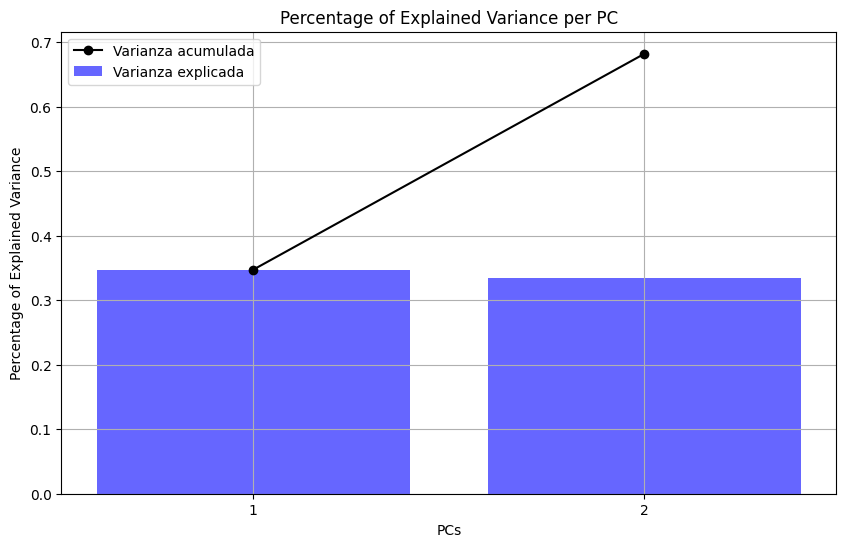

In [ ]:
# Plot Explained Variance
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='b', label='Varianza explicada')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='k', label='Varianza acumulada')

plt.title('Percentage of Explained Variance per PC')
plt.xlabel('PCs')
plt.ylabel('Percentage of Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.legend()
plt.show()

In [ ]:
pca_results.components_

array([[-0.2317862 ,  0.72380243, -0.64991169],
       [ 0.89959845, -0.09471862, -0.42632265]])

In [ ]:
# PCA dataframe
pca_df = pd.DataFrame(data=pca_results.components_.T, columns=['PC1', 'PC2'])

Debido a que solo se tienen 3 varuiables numéricas reales, no se considera buena opción ni necesario aplicar PCA. Las otras variables si bien fueron codificadas, no son numéricas en su naturaleza, si no categóricas, por lo que PCA no es satisfactoriamente aplicable a ellas.

### Factor Analysis

In [ ]:
!pip install factor_analyzer

In [ ]:
data_kmodes

,Subscription Type,Monthly Revenue,Country,Gender,Device,Join Date Month,Age_Bin,Active_Days_Bin,Cluster
0,Basic,10,United States,Male,Smartphone,1,"(20, 30]","(600, 700]",1
1,Premium,15,Canada,Female,Tablet,5,"(30, 40]","(700, 800]",1
2,Standard,12,United Kingdom,Male,Smart TV,2,"(40, 50]","(100, 200]",0
3,Standard,12,Australia,Female,Laptop,10,"(50, 60]","(200, 300]",0
4,Basic,10,Germany,Male,Smartphone,1,"(30, 40]","(100, 200]",1
...,...,...,...,...,...,...,...,...,...
2495,Premium,14,Spain,Female,Smart TV,7,"(20, 30]","(400, 500]",1
2496,Basic,15,Spain,Female,Smart TV,4,"(30, 40]","(400, 500]",1
2497,Standard,12,United States,Male,Laptop,9,"(30, 40]","(300, 400]",0
2498,Standard,13,Canada,Female,Tablet,12,"(40, 50]","(300, 400]",1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# KMO Test
'''
mide la proporción de varianza entre las variables que podría ser común
(compartida) y, por tanto, que puede explicarse mediante factores latentes.
 En otras palabras, evalúa si los datos son adecuados para realizar un análisis factorial.

Valor KMO	    Interpretación
0.90 a 1.00	  Excelente
0.80 a 0.89	  Muy bueno
0.70 a 0.79	  Bueno
0.60 a 0.69	  Aceptable
0.50 a 0.59	  Deficiente
Menor a 0.50	Inaceptable: no hacer análisis factorial
'''
kmo_all, kmo_model = calculate_kmo(data_kmodes_encode)
print(f"KMO Score: {kmo_model}")

# Bartlett's Test
'''
El test de esfericidad de Bartlett se utiliza en análisis factorial para evaluar
si la matriz de correlaciones entre las variables es significativamente diferente de una matriz identidad

H₀ (hipótesis nula): La matriz de correlaciones es una matriz identidad (no hay correlación entre variables).
'''
chi_square_value, p_value = calculate_bartlett_sphericity(data_kmodes_encode)
print(f"Chi-Square: {chi_square_value}, P-value: {p_value}")

KMO Score: 0.5023637844953689
Chi-Square: 1175.9662170753013, P-value: 7.233291866924564e-230




---



In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity


In [ ]:
fa = FactorAnalyzer(n_factors=3)
fa.fit(data_kmodes_encode)

'''
Un loading indica cuánto contribuye un factor a explicar la variabilidad de una variable.
'''
factor_loadings = pd.DataFrame(fa.loadings_, index=data_kmodes_encode.columns)
print(factor_loadings)

                          0         1         2
Subscription Type  0.020919  0.204371  0.022466
Monthly Revenue   -0.008864  0.021949 -0.025058
Country            0.129543  1.019025  0.013942
Gender            -0.008567  0.000825 -0.046850
Device             0.005075 -0.014080 -0.025049
Join Date Month   -0.610936 -0.072188  0.032661
Age_Bin           -0.184539 -0.013473  1.007561
Active_Days_Bin    1.005915  0.095032 -0.025495


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:
varianza_explicada, pct_de_varianza, pct_de_varianza_acumulada = fa.get_factor_variance()
pct_de_varianza_acumulada

array([0.17956983, 0.31648025, 0.44411096])

In [ ]:
eigenvalues = fa.get_eigenvalues()
eigenvalues

(array([1.59679793, 1.2085414 , 1.05564959, 1.00605155, 0.99508105,
        0.93090231, 0.79377376, 0.41320241]),
 array([ 1.38725573,  1.10772947,  1.02164967,  0.04562345,  0.02980961,
        -0.00261256, -0.01428761, -0.02228009]))

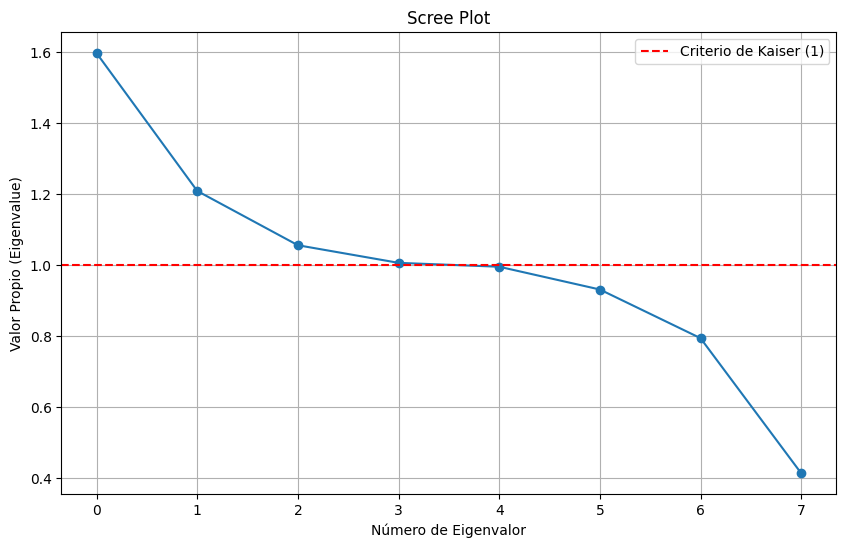

In [ ]:
'''
El criterio de Kaiser (también conocido como regla del valor propio mayor que 1)
es una regla práctica utilizada en análisis factorial y análisis de componentes
principales (PCA) para decidir cuántos factores (o componentes) retener.


Se deben retener solo los factores cuyo eigenvalor (valor propio) sea mayor que 1.
'''
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues[0], marker='o')
plt.title('Scree Plot')
plt.xlabel('Número de Eigenvalor')
plt.ylabel('Valor Propio (Eigenvalue)')
plt.xticks(range(0, len(eigenvalues[0])))  # Ejes X para cada factor
plt.axhline(1, linestyle='--', color='red', label='Criterio de Kaiser (1)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# reducción de dimensiones
df_reduced = fa.transform(data_kmodes_encode)
df_reduced = pd.DataFrame(df_reduced, columns=[f'Factor_{i+1}' for i in range(df_reduced.shape[1])])
df_reduced.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,Factor_1,Factor_2,Factor_3
0,2.519261,0.977309,-1.149643
1,3.521078,-1.472782,0.250954
2,-1.462123,1.126974,0.628066
3,-0.438692,-1.656609,2.028392
4,-1.360636,-0.179244,-0.621588


In [ ]:
# Factor Analysis: No-renovation after 1 year?: Money, :( , <$)

In [ ]:
# Slides: Thurs 12nd 17:30 -> Final Sat: 20:00 MAX